# Peterside Hospital - Heart Disease Case Study

In [1]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Preprocessing library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import Classifier libraries - ML Algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("..\Heart_Disease\Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Features in the dataset and meaning
- age - age in years
- sex - (1- Male; 0 - Female)
- chest pain type (cp) {1:typical angina, 2:atypical angina, 3:Non-anginal pain, 4:asymptomatic}
- resting blood pressure (trestbps) (in mm Hg on admission to the hospital)
- serum cholesterol (chol) (in mg/dl)
- fasting blood sugar (fbs) (fasting blood sugar > 120 mg/dl) - (1-true; 0-false)
- resting electrocardiographic results (restecg)
- maximum heart rate achieved (thalach) 
- exercise-induced angina (exang) {1-Yes; 0-No}
- ST depression induced by exercise relative to rest (oldpeak)
- the slope of the peak exercise ST segment (slope)
- number of major vessels colored by flourosopy (ca)
- thalassemia (thal) {3-Normal; 6-fixed defect; 7-reversable defect}
- target - have disease or not {1-Yes; 0-No}

In [3]:
# Rename columns for better understanding
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
           'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Data verification - Data type, number of features and rows, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

- No missing values

In [5]:
# Statistcial Analysis of the Data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

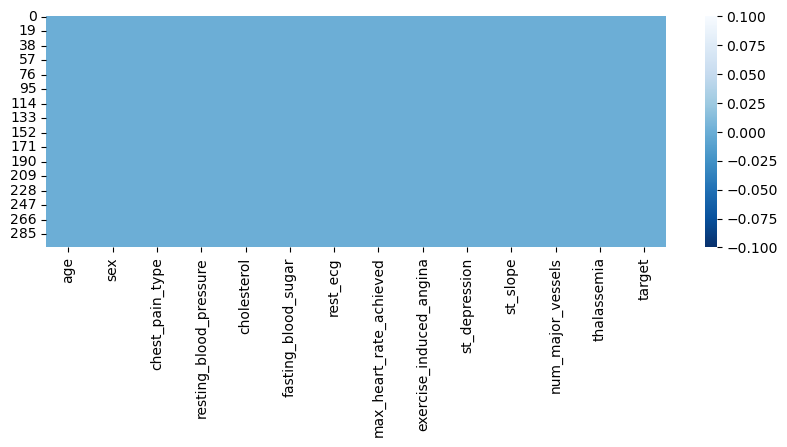

In [6]:
# Check for missing values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

# Explortory Data Analysis

## 1. Univariate Analysis

In [7]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

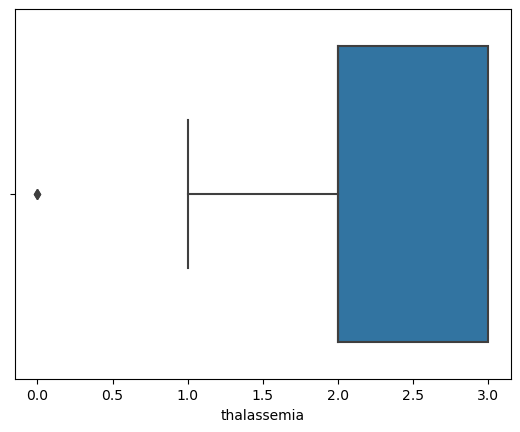

In [8]:
# Check for outliers
sns.boxplot(x=df['thalassemia'])

<Axes: xlabel='cholesterol'>

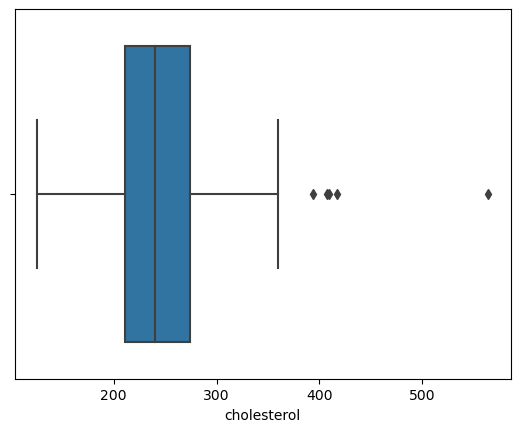

In [9]:
sns.boxplot(x=df['cholesterol'])

<Axes: xlabel='resting_blood_pressure'>

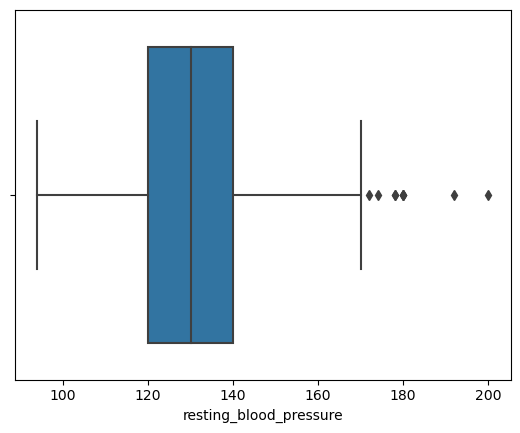

In [10]:
sns.boxplot(x=df['resting_blood_pressure'])

<Axes: xlabel='max_heart_rate_achieved'>

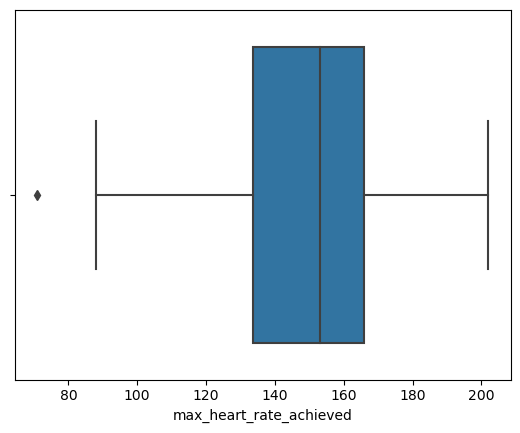

In [11]:
sns.boxplot(x=df['max_heart_rate_achieved'])

Text(0.5, 1.0, 'Total Number of Patients')

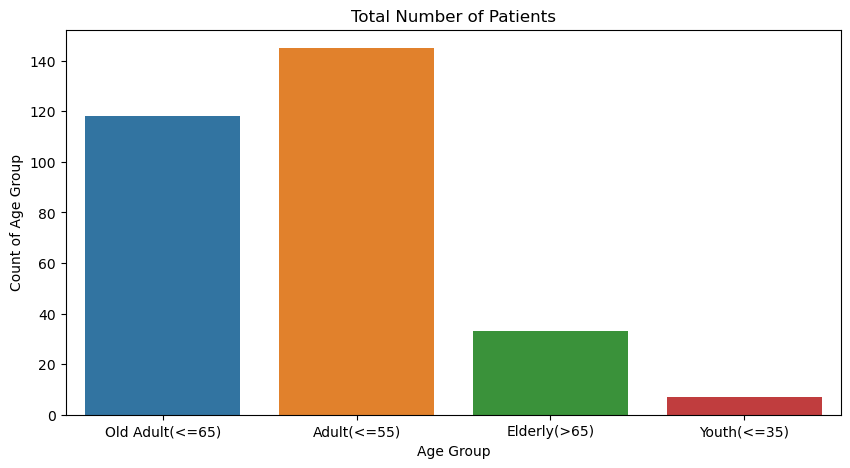

In [12]:
# Data visualization - Age_bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

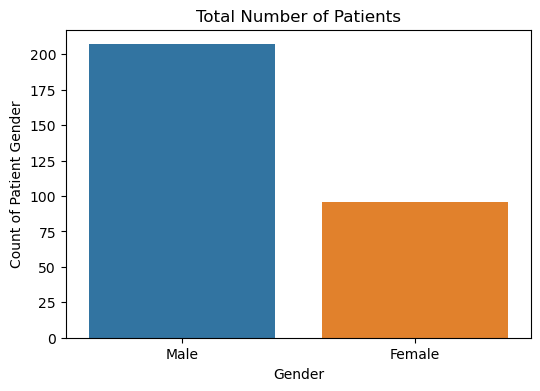

In [13]:
# Data Visualization - Gender
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
df['gender'] = df['sex'].apply(gender)

# Investigating gender details
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

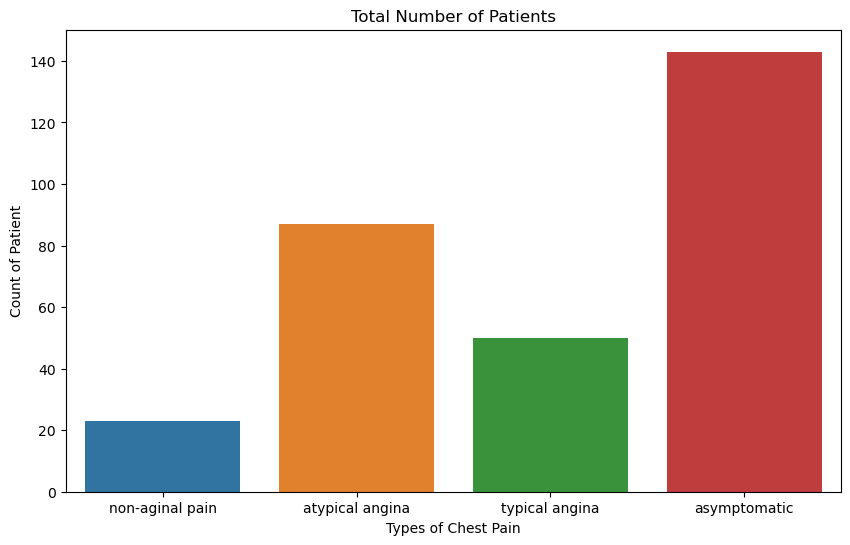

In [14]:
# Data Visualization - Chest Pain Type
def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-aginal pain"
    else:
        return "asymptomatic"
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

# Investigating the Chest Pain Type of patients
plt.figure(figsize=(10,6))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of Patient')
plt.title('Total Number of Patients')

label
Yes    165
No     138
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

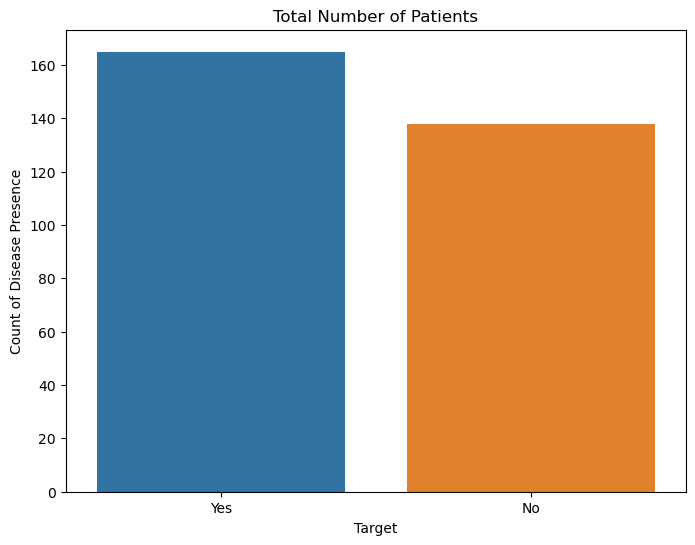

In [15]:
# Data Visualization - Target (Have disease or not - 1- Yes, 0 - No)
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
df['label'] = df['target'].apply(label)

# Total Patient in Each Category
print(df['label'].value_counts())

# Investigating the target variable
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of Disease Presence')
plt.title('Total Number of Patients')

## 2. Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

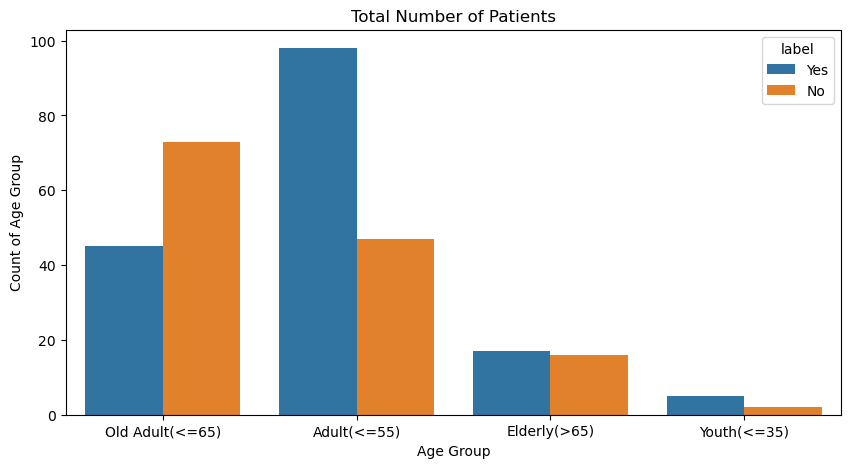

In [16]:
# Investigating the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')


Text(0.5, 1.0, 'Total Number of Patients')

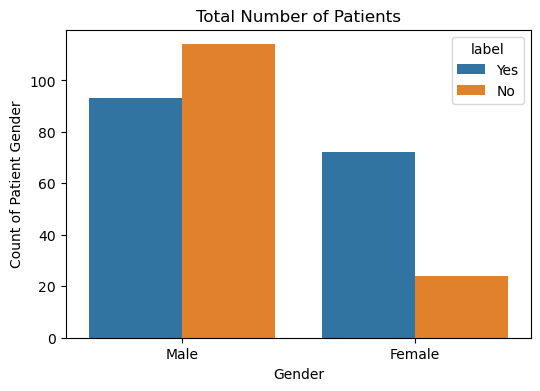

In [17]:
# Investigating gender details by the target feature
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

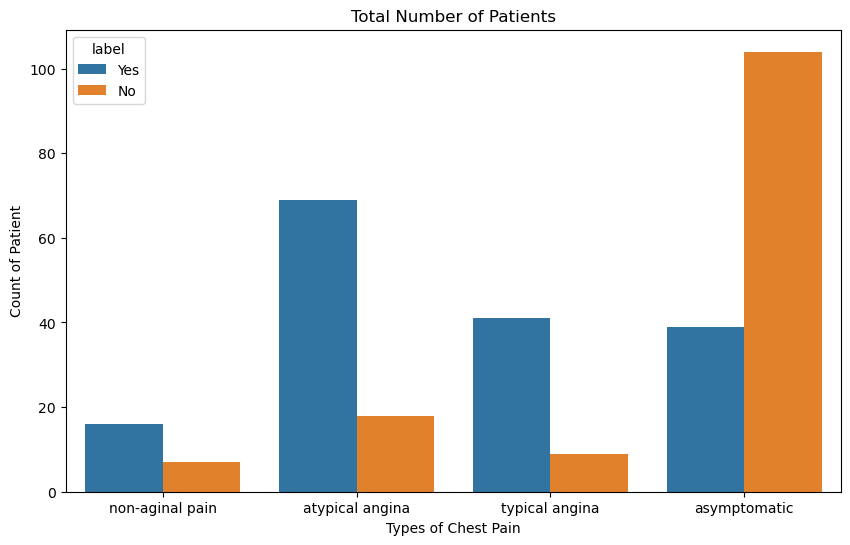

In [18]:
# Investigating the Chest Pain Type of patients by target feature
plt.figure(figsize=(10,6))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of Patient')
plt.title('Total Number of Patients')

## 3. Multivariate Analysis

In [19]:
# Correlation Matrix
#plt.figure(figsize=(10,10))

#hm = sns.heatmap(df.corr(), cmap=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
#hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

## Feature Engineering/Data Pre-processing

In [20]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-aginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


In [21]:
# Create a new dataframe from the original dataset- to exclude columns from target to label
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
           'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']]

label = df[['target']]

In [22]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [24]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [25]:
# Dealing with Outliers - resting blood pressure, cholesterol, thalassemia
# Normalize the data
scaler = MinMaxScaler()

df1['Scaled_RBP'] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['Scaled_chol'] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['Scaled_thal'] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['Scaled_max_heart_rate'] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'max_heart_rate_achieved'], axis=1, inplace=True)
df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## Machine Learning

In [26]:
# Split the dataset into training and testing sets - X = Questions, y = Answers
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [27]:
# Model Building using Logistic Regression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test, ly_pred))
print("Precision: ", precision_score(y_test, ly_pred))
print("Recall: ", recall_score(y_test, ly_pred))
print("F1-score: ", f1_score(y_test, ly_pred))
print("AUC-ROC: ", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy:  0.8524590163934426
Precision:  0.8709677419354839
Recall:  0.84375
F1-score:  0.8571428571428571
AUC-ROC:  0.8529094827586207


- Precision is the most preferred evaluation metrics since it is the highest performing model.

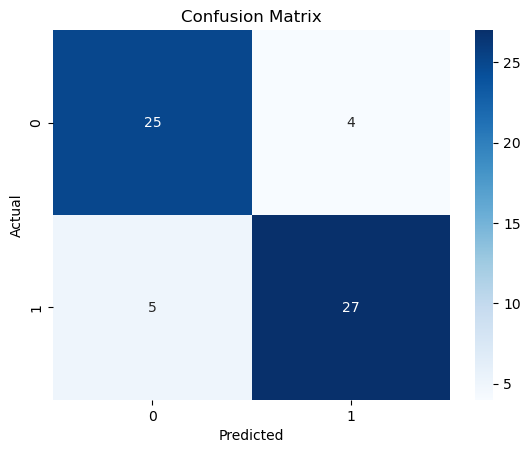

In [28]:
# Create a Confusion Matrics - Logistic Regression
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the Confusion Matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

From the Confusion Matrix, the following can be observed:
- The actual number of patients predicted to have the heart disease are 27 ( True Positive).
- The actual number of patients predicted to have the heart disease are 5 and it's actually false (False Negative).
- The actual number of patients predicted not to have the heart disease are 25 (True Negative).
- The actual number of patients predicted to have the heart disease are 4 and it's actually false (False Positive).

In [29]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Random Forest Classifier")
print("Accuracy: ", accuracy_score(y_test, rfy_pred))
print("Precision: ", precision_score(y_test, rfy_pred))
print("Recall: ", recall_score(y_test, rfy_pred))
print("F1-score: ", f1_score(y_test, rfy_pred))
print("AUC-ROC: ", roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy:  0.8360655737704918
Precision:  0.84375
Recall:  0.84375
F1-score:  0.84375
AUC-ROC:  0.8356681034482758


- Recall was established to be the the best performing metric in Random Forest model.

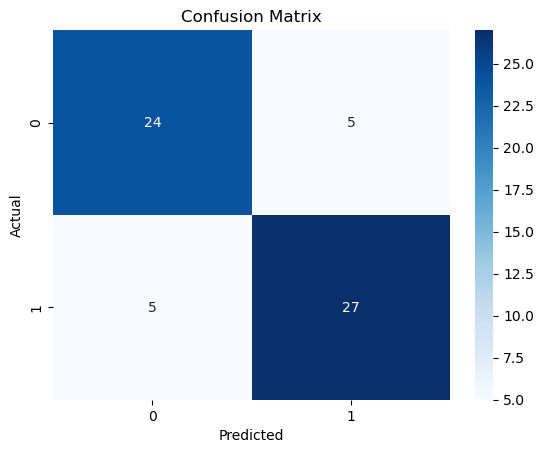

In [30]:
# Create a Confusion Matrics - Random Forest Classifier
rfm = confusion_matrix(y_test, rfy_pred)

# Visualize the Confusion Matrix
sns.heatmap(rfm, annot=True, cmap='Blues', fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Using Random Forest Classifier model, I can observe that:
- The number of patients with heart disease are 28 (TP).
- The number of patients without heart disease are 24 (TN).
- The number of patients predicted not to have the heart disease is 0 but the actual number of patients with the heart disease are 4 (FN).
- The number of patients predicted to have the heart disease are 5 but actually they do not have the disease (FP).

# How to Deploy ML Models

In [31]:
# 8 Machine Learning Algorithms will be applied to the dataset
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']]

In [32]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score * 100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score * 100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score * 100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score * 100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [33]:
print('Accuracy Score')
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,75.41%,67.21%,65.57%,86.89%,85.25%,85.25%


In [34]:
print('Precision Score')
pl = pd.DataFrame(precision_list)
pl.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.21%,84.38%,79.31%,62.0%,65.71%,90.0%,92.59%,87.1%


In [35]:
print('Recall Score')
rel = pd.DataFrame(recall_list)
rel.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.12%,84.38%,71.88%,96.88%,71.88%,84.38%,78.12%,84.38%


In [36]:
print('ROC Score')
rl = pd.DataFrame(roc_list)
rl.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.17%,83.57%,75.59%,65.68%,65.25%,87.02%,85.61%,85.29%


In conclusion:
- When using Recall Score metrics, SGD Classifier algorithm proved to be the best model with 100% performance.
- Descision Tree proved to be the best model when using precision metric.
- Naive Bayes model performed well on matters accuracy.
- Naive Bayes model also performed well with ROC AOU Score metric.
Thus, Naive Bayes performed well in more than one metric.